In [1]:
from functools import partial
import numpy as np
from scipy.optimize import root_scalar, minimize, newton, root_scalar, brentq, basinhopping
import nidaqmx as ni
from K10CR1 import K10CR1_stage
import matplotlib.pyplot as plt
import pyvisa
from tqdm import tqdm
import time

class PowerMeter:
    def __init__(self, address='USB0::0x1313::0x8078::P0011410::INSTR'):
        self.rm = pyvisa.ResourceManager()
        self.pm = self.rm.open_resource('USB0::0x1313::0x8078::P0011410::INSTR')
        self.pm.write("SENS:RANGE:AUTO ON")
        self.pm.write("SENS:CORR:WAV 658")
        #set units to Watts
        self.pm.write("SENS:POW:UNIT W")
        #set averaging to 1000 points
        self.pm.write("SENS:AVER:1000")

    def measure(self):
        power = self.pm.query_ascii_values("MEAS:POW?")[0]
        return power * 1E6
    
    def close(self):
        self.pm.close()
        self.rm.close()



In [2]:
hwp = K10CR1_stage(serial_no=55422054, verbose=False)
hwp.initialize_instrument()
hwp.home()
# qwp = K10CR1_stage(serial_no=55425654, verbose=False)
# qwp.initialize_instrument()
# qwp.home()
pol = K10CR1_stage(serial_no=55425654, verbose=False)
pol.initialize_instrument()
pol.home()

Important: make sure you are not running Kinesis software in the meantime. 
Otherwise the initialization will fail.
Important: make sure you are not running Kinesis software in the meantime. 
Otherwise the initialization will fail.


In [3]:
def rotate(optic,
           start=0,
           end=180, 
           num=31,
           pm=None,
           plot=True):

    angles = np.linspace(start,end,num)
    readings = np.zeros(shape=(num))
    
    # Stablize
    time.sleep(0.25)

    for index, angle in enumerate(angles):
        optic.move(angle)
        reading = pm.measure()
        readings[index] = reading
    

    if plot: 
        fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
        ax.plot(angles / 180.0 * np.pi, readings)
        ax.set_ylim(0,)
        plt.show()

    return angles * np.pi / 180, readings

0 0.0


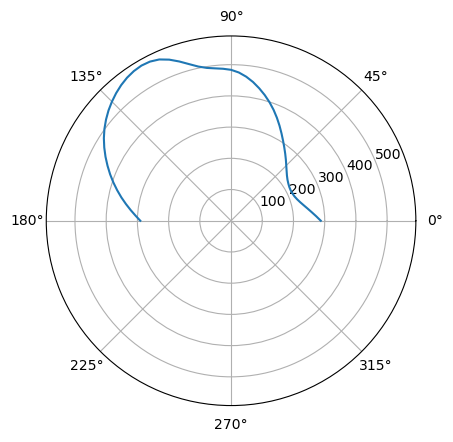

1 7.5


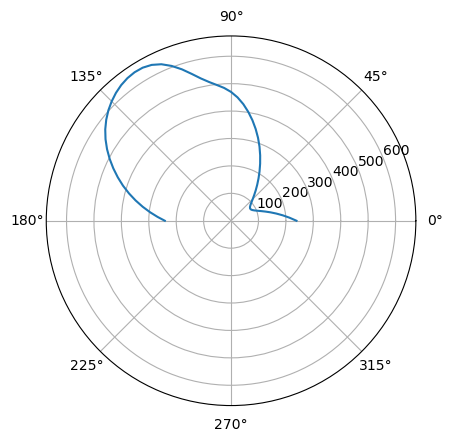

2 15.0


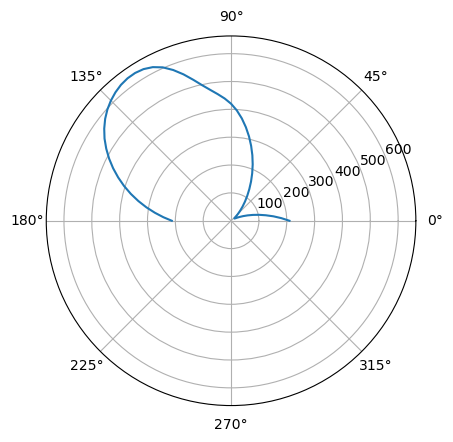

3 22.5


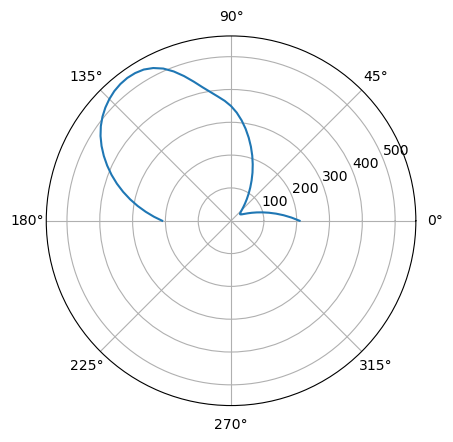

4 30.0


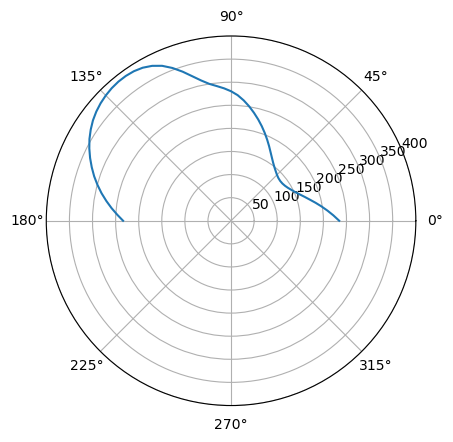

5 37.5


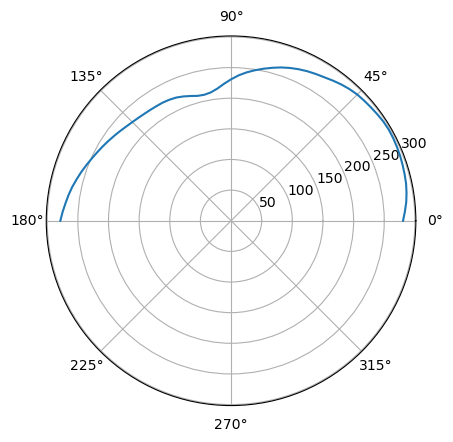

6 45.0


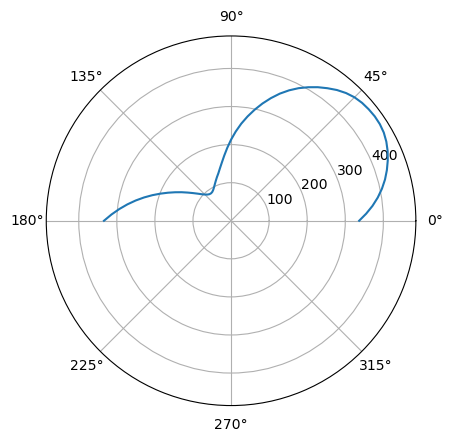

7 52.5


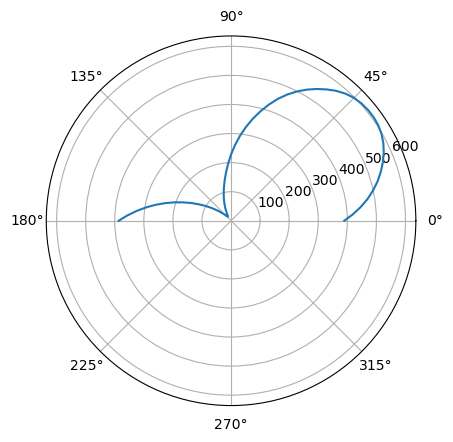

8 60.0


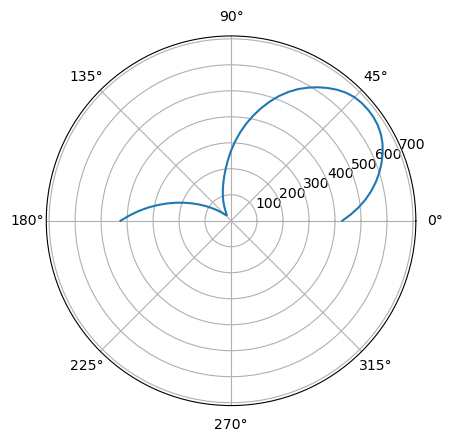

9 67.5


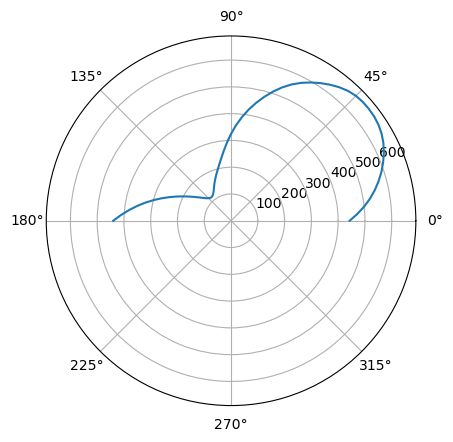

10 75.0


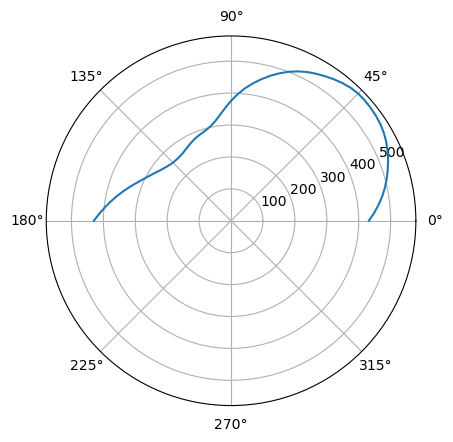

11 82.5


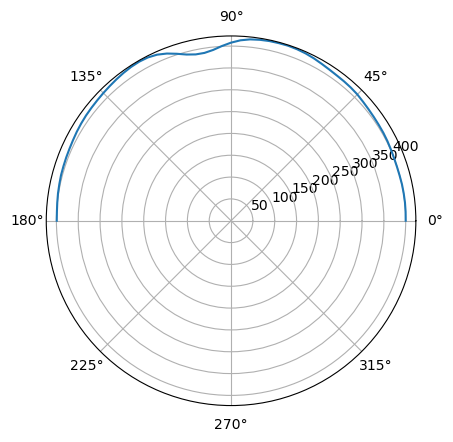

12 90.0


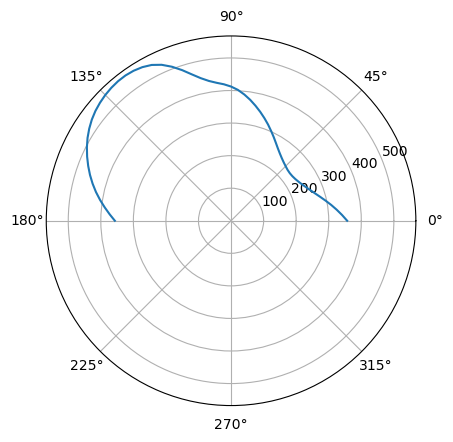

13 97.5


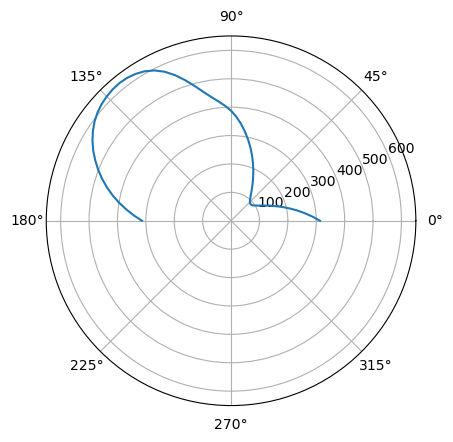

14 105.0


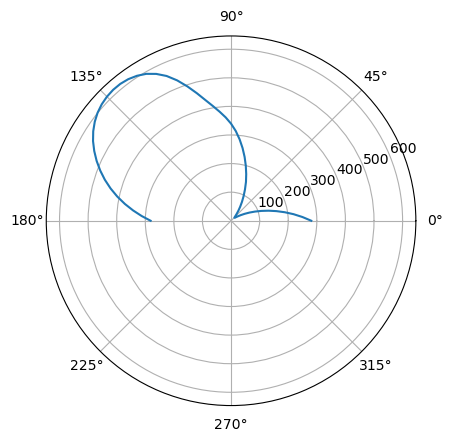

15 112.5


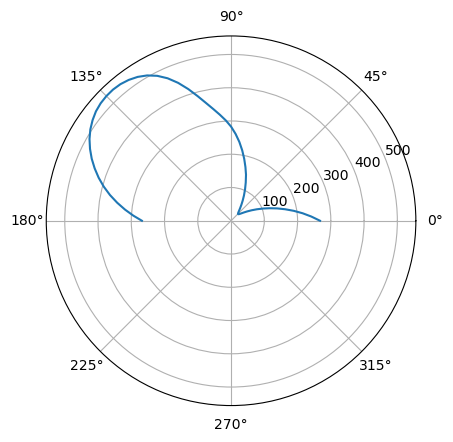

16 120.0


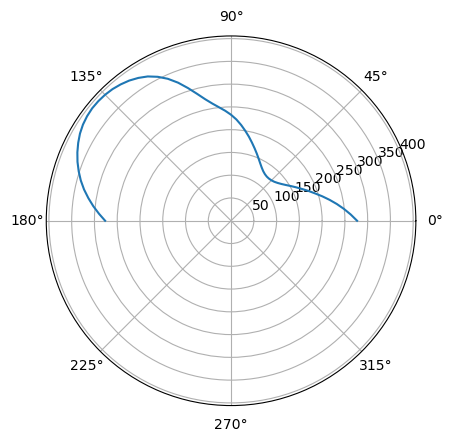

17 127.5


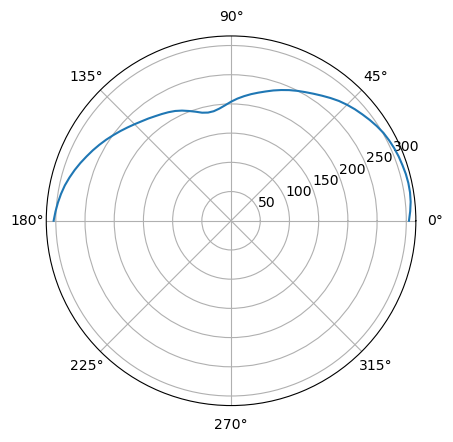

18 135.0


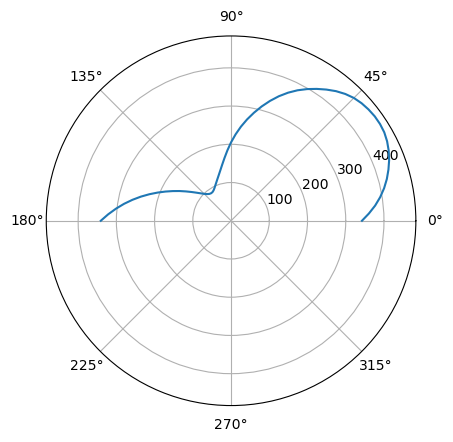

19 142.5


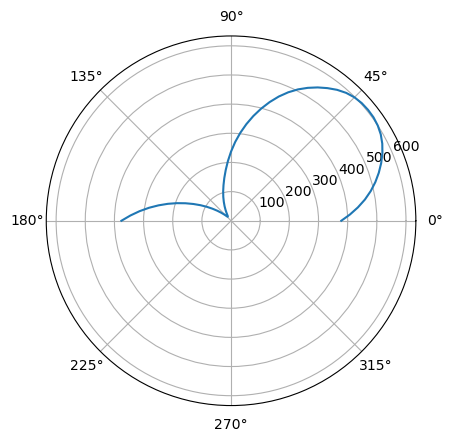

20 150.0


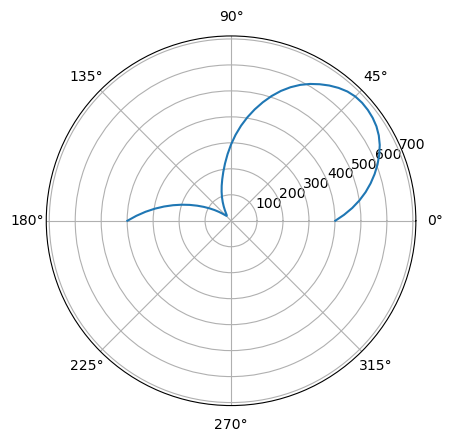

21 157.5


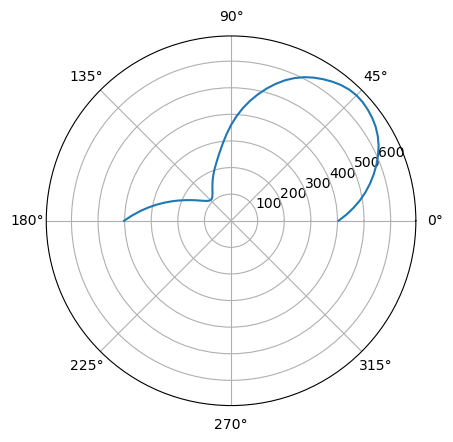

22 165.0


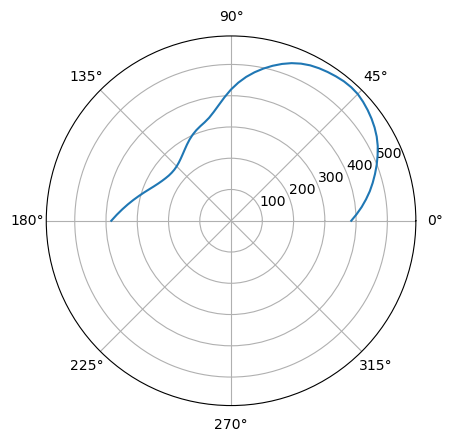

23 172.5


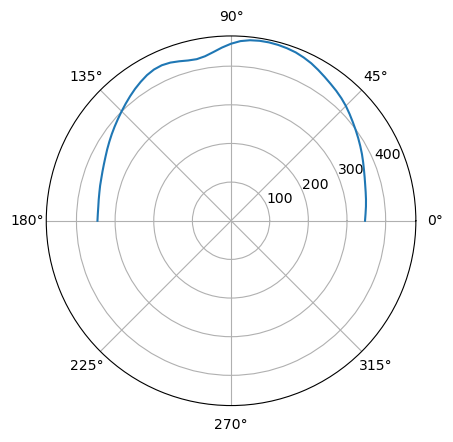

In [4]:
pm = PowerMeter()

hwp_angles = np.linspace(0,180,num=24, endpoint=False)
results = []
for index, incident_angle in enumerate(hwp_angles):
    print(index, incident_angle)
    hwp.move(incident_angle)

    test_angles, test_readings = rotate(optic=pol, start=0, end=180, num=61, pm=pm)

    hwp.home()
    pol.home()
    
    results.append([test_angles, test_readings])


In [7]:
np.array(results)

(24, 2, 61)

In [9]:
np.save('results', np.array(results))